<a href="https://colab.research.google.com/github/DouglasC07/Proejeto_Airbnb/blob/main/Analisando_os_Dados_do_Airbnb_(Cambridge_Massachusetts)_V1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Cambridge (Massachusetts)*

<center><img src="https://images.unsplash.com/photo-1570122712585-b7cff982ebc2?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80" height="400px"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Cambridge, e ver quais insights podem ser extraídos a partir de dados brutos.**




  Cambridge pertence ao estado de Massachusetts (EUA), nomeado em homenagem a Universidade de Cambridge (Inglaterra). Possui duas das
maiores universidades do mundo, Harvad e MIT. 

O visitante tem a possibilidade de conhecer essas grandes universidades, que possui visitas monitoradas onde são apresentadas a arquitetura e os monumentos, além disso a região conta com o cemitério de Mount Auburn, importante ponto turístico.

  Muitos nomes importantes se formaram em alguma dessas instituições como Barack Obama, Bill Gates, Margaret Atwood, Buzz Aldrin, Shirley Ann Jackson  entre outros. A curiosidade em conhecer o lugar onde essas grandes personalidades estudaram, faz com que a região receba muitas pessoas o que acaba sendo positivo para os comércios locais e serviços de hospedagem.

## Obtenção dos Dados

Inicialmente é necessário importar as bibliotecas e o dataset que será estudado.


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
  # importar o arquivo listings.csv para um DataFrame
  df = pd.read_csv("http://data.insideairbnb.com/united-states/ma/cambridge/2022-09-22/visualisations/listings.csv")

## Análise dos Dados

É importante informar o que cada variável (coluna) representa, facilitando a compreensão das informações ali presentes.


**Dicionário das variáveis**

* `id`- número de id gerado para identificar o imóvel
* `name`- nome da propriedade anunciada
* `host_id`- número de id do proprietário (anfitrião) da propriedade
* `host_name`- nome do anfitrião
* `neighbourhood_group`- esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude`- coordenada da latitude da propriedade
* `longitude`- coordenada da longitude da propriedade
* `room_type`- informa o tipo de quarto que é oferecido
* `price`- preço para alugar o imóvel
* `minimum_nights`- quantidade mínima de noites para reservar
* `number_of_reviews`- número de reviews que a propriedade possui
* `last_review`- data do último review
* `reviews_per_month`- quantidade de reviews por mês
* `calculated_host_listings_count`- quantidade de imóveis do mesmo anfitrião
* `availability_365`- número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número total de reviews que uma propriedade recebeu nos últimos 12 meses
* `licence`- Autorização/Permissão

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7903,"Colorful, modern 2 BR apt shared with host",14169,Stacy,NaN,Agassiz,42.39031,-71.09361,Private room,118,4,295,2022-09-06,1.83,1,10,16,NaN
1,8521,SunsplashedSerenity walk to Harvard & Fresh Pond,306681,Janet,NaN,West Cambridge,42.38258,-71.13646,Entire home/apt,300,2,50,2022-08-28,0.31,2,258,5,C0121120491
2,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,East Cambridge,42.35867,-71.06307,Entire home/apt,110,91,25,2020-04-15,0.25,5,279,0,NaN
3,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,NaN,Area 2/MIT,42.35061,-71.08787,Entire home/apt,135,29,5,2020-12-02,0.06,11,355,0,NaN
4,10986,North End (Waterfront area) CLOSE TO MGH & SU...,38997,Michelle,NaN,East Cambridge,42.36377,-71.05206,Entire home/apt,135,33,2,2016-05-23,0.03,11,356,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Antes de responder a primeira pergunta, vale contextualizar que o conjunto de dados está organizado em forma tabular, ou seja, linhas e colunas. Quando estamos querendo saber os atributos(Variáveis) e entradas, estamos nos referindo a quantidade de colunas e linhas respectivamente.

O *dataset* utilizado é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa `(listings.csv.gz)`. 



In [ ]:
  # identificar o volume de dados do DataFrame
  print("Entradas:\t {}".format(df.shape[0]))
  print("Variáveis:\t {}\n".format(df.shape[1]))

  # verificar as 5 primeiras entradas do dataset
  display(df.dtypes)

Entradas:	 3089
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* é possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* A variável `Licence` possui mais da metade das linhas com valores nulos, cerca de 56,8%.
* As variáveis `reviews_per_month` e `last_review` possuem o mesmo valor de linhas com valores nulos, aproximadamente 24,3%.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.568145
reviews_per_month                 0.243121
last_review                       0.243121
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

#### Limpeza de Dados

Nesse dataset em específico, o conjunto de dados representado pelas colunas `neighbourhood_group`, `license`, `reviews_per_month`, `last_review` podem ser excluidas totalmente devido a grande quantidade de valores ausentes e baixo poder preditivo.

In [ ]:
# Verificando dados ausentes
(df.isnull().sum()).sort_values(ascending=False)

neighbourhood_group               3089
license                           1755
reviews_per_month                  751
last_review                        751
minimum_nights                       0
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
id                                   0
name                                 0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_name                            0
host_id                              0
price                                0
dtype: int64

In [ ]:
# Excluindo colunas com dados faltantes
df.drop(columns=['neighbourhood_group', 'license', 'reviews_per_month', 'last_review'], inplace=True)

In [ ]:
# Verificando o resultado 
(df.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f185f99fca0>,
      dtype=object)

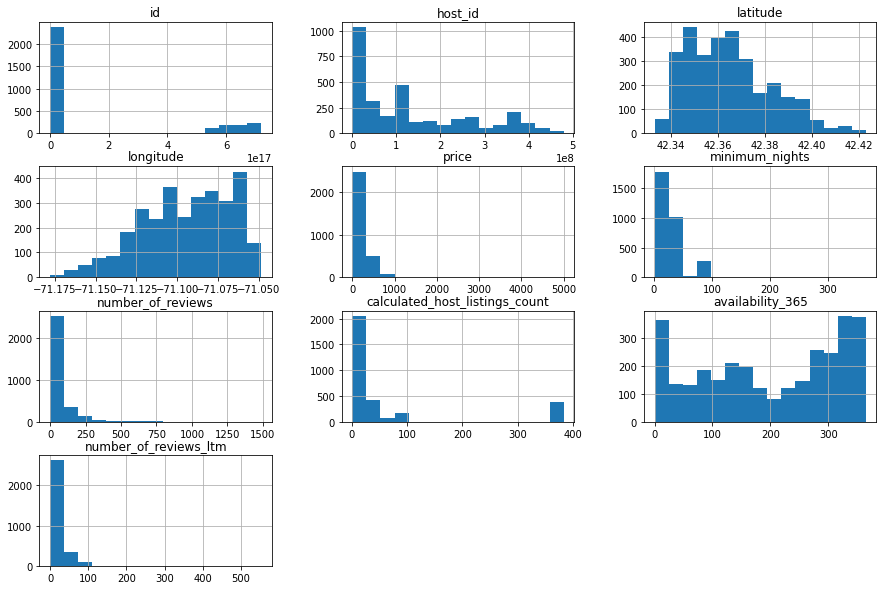

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### **Q4. Qual a média dos preços de aluguel?**

Como pode ser observado nos histogramas, existe indícios de *outliers*, provocando grande influência na média das variáveis numéricas, isto pode ser observado na variável `price`por exemplo. Lembrando que os outliers podem alterar a média elevando ou diminuindo o seu valor.

In [ ]:
# ver a média da coluna `price`
df.price.mean()

244.62220783425056

Existem duas maneiras que auxiliam a detecção de *outliers*, são elas:
* Resumo estatístico por meio do método `describe`.
* Plotar `boxplots`para a variável.

In [ ]:
 # Ver resumo estatístico das variáveis númericas 
 df[['price','minimum_nights','number_of_reviews',
     'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000
mean,244.622208,21.636776,50.929427,62.811590,198.554872
std,220.303675,31.701482,89.946567,122.227894,121.063269
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,125.000000,1.000000,1.000000,2.000000,91.000000
50%,207.000000,5.000000,11.000000,11.000000,212.000000
75%,300.000000,31.000000,66.000000,39.000000,314.000000
max,5000.000000,365.000000,1489.000000,383.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price`possui 75% do valor abaixo de 300. porém seu valor mínimo é 0(zero) e máximo é 5000.

* A variável `number_of_reviews` (número de comentários) possui 75% do valor abaixo de 66, porém seu valor máximo é 1489.

* Através da observação desses resultados, fica nítido a necessidade de fazer a "limpeza" dos *Outliers*, para isso utilizaremos o `IQR Store`.

##  IQR

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

## IQR = Q3 - Q1

* Em cada uma das variáveis que forem limpas, será necessário definir Q1 e Q3.
* Calcular IQR.
* Definir os limites inferiores e superiores de corte dos outliers.

In [ ]:
# Identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
iqr_price = q3_price - q1_price
print('IQR da variável price:', iqr_price)

# definindo os limites
sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price

print('Limite superior de price:', sup_price)
print('Limite inferior de price:', inf_price)

IQR da variável price: 175.0
Limite superior de price: 562.5
Limite inferior de price: -137.5


Os valores iguais a zero, precisam ser tratados, pois não foi "filtrado" devido ao limite inferior ser negativo.

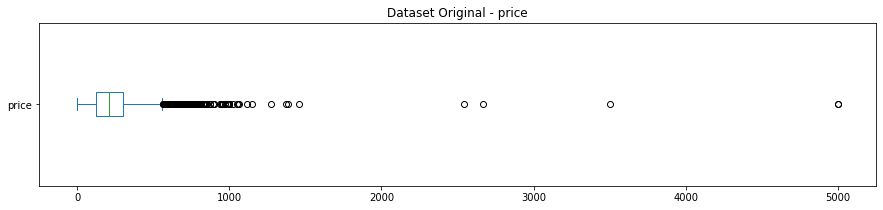

O dataset possui 3089 linhas
140 Entradas acima de 562.5
Representam 4.53% do dataset


In [ ]:
# Verificando o conjunto Original
fig, ax=plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} linhas".format(df.shape[0]))
print("{} Entradas acima de 562.5".format(len(df[df.price > 562.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 562.5]) / df.shape[0])*100))

In [ ]:
# Identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights:', iqr_minimum_nights)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights

print('Limite superior de minimum_nights:', sup_minimum_nights)
print('Limite inferior de minimum_nights:', inf_minimum_nights)

IQR da variável minimum_nights: 30.0
Limite superior de minimum_nights: 76.0
Limite inferior de minimum_nights: -44.0


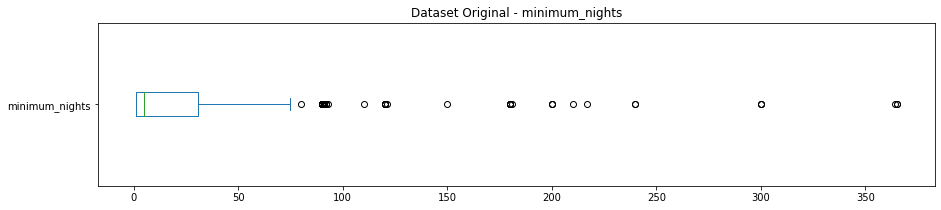

O dataset possui 3089 linhas
282 Entradas acima de 76
9.1292%


In [ ]:
  # Verificando o conjunto original
  fig, ax = plt.subplots(figsize=(15,3))
  df.minimum_nights.plot(kind='box', vert=False);
  ax.set_title('Dataset Original - minimum_nights')
  plt.show()
  print("O dataset possui {} linhas".format(df.shape[0]))
  print("{} Entradas acima de 76".format(len(df[df.minimum_nights > 76])))
  print("{:.4f}%".format((len(df[df.minimum_nights > 76]) / df.shape[0])*100))

In [ ]:
  # Identificando os outliers para a variável number_of_reviews
  q1_number_of_reviews = df.number_of_reviews.quantile(.25)
  q3_number_of_reviews = df.number_of_reviews.quantile(.75)
  iqr_number_of_reviews = q3_number_of_reviews - q1_number_of_reviews
  print('IQR da variável number_of_reviews:', iqr_number_of_reviews)

  # definindo os limites
  sup_number_of_reviews = q3_number_of_reviews + 1.5 * iqr_number_of_reviews
  inf_number_of_reviews = q1_number_of_reviews - 1.5 * iqr_number_of_reviews

  print('Limite superior de number_of_reviews:', sup_number_of_reviews)
  print('Limite inferior de number_of_reviews:', inf_number_of_reviews)

IQR da variável number_of_reviews: 65.0
Limite superior de number_of_reviews: 163.5
Limite inferior de number_of_reviews: -96.5


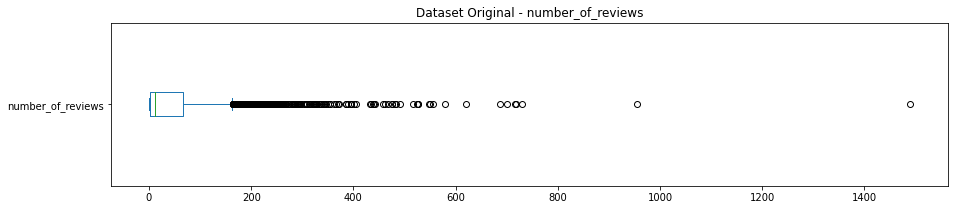

O dataset possui 3089 entradas
285 Entradas acima de 163.5
Representam 9.23% do dataset


In [ ]:
  # verificando o conjunto original
  fig, ax = plt.subplots(figsize=(15,3))
  df.number_of_reviews.plot(kind='box', vert=False);
  ax.set_title('Dataset Original - number_of_reviews')
  plt.show()
  print("O dataset possui {} entradas".format(df.shape[0]))
  print("{} Entradas acima de 163.5".format(len(df[df.number_of_reviews > 163.5])))
  print("Representam {:.2f}% do dataset".format((len(df[df.number_of_reviews > 163.5]) / df.shape[0])*100))

In [ ]:
# identificando os outliers para a variável calculated_host_listings_count
q1_calculated_host_listings_count = df.calculated_host_listings_count.quantile(.25)
q3_calculated_host_listings_count = df.calculated_host_listings_count.quantile(.75)
iqr_calculated_host_listings_count = q3_calculated_host_listings_count - q1_calculated_host_listings_count
print('IQR da variável calculated_host_listings_count:', iqr_calculated_host_listings_count)

# definindo os limites
sup_calculated_host_listings_count = q3_calculated_host_listings_count + 1.5 * iqr_calculated_host_listings_count
inf_calculated_host_listings_count = q1_calculated_host_listings_count - 1.5 * iqr_calculated_host_listings_count

print('Limite superior de calculated_host_listings_reviews:', sup_calculated_host_listings_count)
print('Limite inferior de calculated_host_listings_reviews:', inf_calculated_host_listings_count)

IQR da variável calculated_host_listings_count: 37.0
Limite superior de calculated_host_listings_reviews: 94.5
Limite inferior de calculated_host_listings_reviews: -53.5


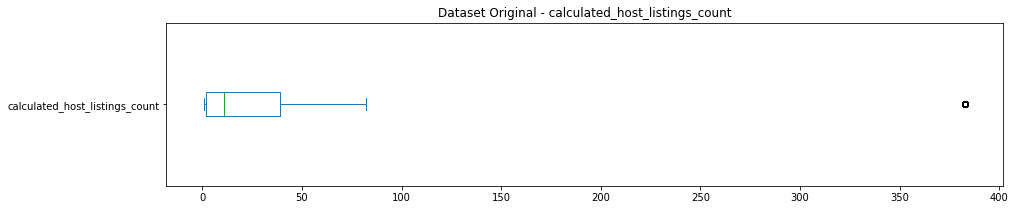

O dataset possui 3089 entradas
383 Entradas acima de 94.5
Representam 12.40% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.calculated_host_listings_count.plot(kind='box', vert=False);
ax.set_title('Dataset Original - calculated_host_listings_count')
plt.show()
print("O dataset possui {} entradas".format(df.shape[0]))
print("{} Entradas acima de 94.5".format(len(df[df.calculated_host_listings_count > 94.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.calculated_host_listings_count > 94.5]) / df.shape[0])*100))

In [ ]:
# Identificando os outliers para a variável availability_365
q1_availability_365 = df.availability_365.quantile(.25)
q3_availability_365 = df.availability_365.quantile(.75)
iqr_availability_365 = q3_availability_365 - q1_availability_365
print('IQR da variável availability_365:', iqr_availability_365)

# definindo os limites
sup_availability_365 = q3_availability_365 + 1.5 * iqr_availability_365
inf_availability_365 = q1_availability_365 - 1.5 * iqr_availability_365

print('Limite superior de availability_365:', sup_availability_365)
print('Limite inferior de availability_365:', inf_availability_365)

IQR da variável availability_365: 223.0
Limite superior de availability_365: 648.5
Limite inferior de availability_365: -243.5


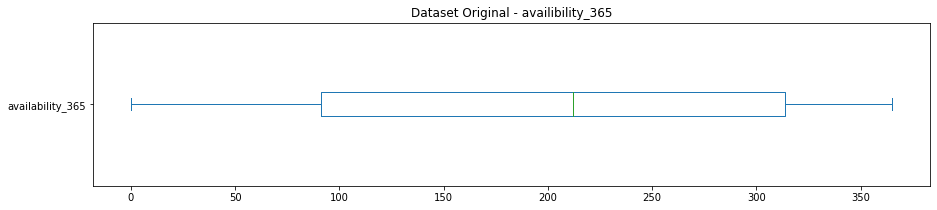

O dataset possui 3089 entradas
0 Entradas acima de 648.5
Representam 0.00% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.availability_365.plot(kind='box', vert=False);
ax.set_title('Dataset Original - availibility_365')
plt.show()
print("O dataset possui {} entradas".format(df.shape[0]))
print("{} Entradas acima de 648.5".format(len(df[df.availability_365 > 648.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.availability_365 > 648.5]) / df.shape[0])*100))

Como pode ser observado, a  variável `availability_365` não encontrou nenhum valor acima do limite superior, para ser eliminado.

#### Histogramas sem outliers

Já que identificamos outliers nas variáveis `price`e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

In [ ]:
  # Remover os *outliers* em um novo DataFrame
  df_clean = df.copy()

  df_clean.drop(df_clean[df_clean.price > 562.5].index, axis=0, inplace=True)
  df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
  df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
  df_clean.drop(df_clean[df_clean.number_of_reviews > 163.5].index, axis=0, inplace=True)
  df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 94.5].index, axis=0, inplace=True)

  print('Shape antes da limpeza:', df.shape)
  print('Shape após a limpeza:', df_clean.shape)

Shape antes da limpeza: (3089, 14)
Shape após a limpeza: (1883, 14)


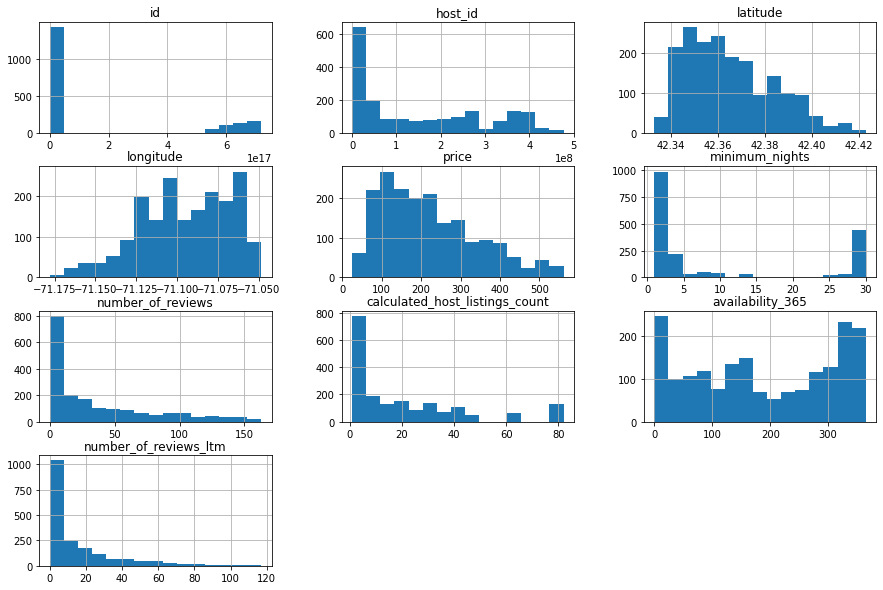

In [ ]:
# Plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
 # Nova média de preços após a remoção dos outliers na variável price

 df_clean.price.mean()

221.0711630377058

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
                 'calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.180327,-0.039410,0.117725,0.171786
minimum_nights,-0.180327,1.000000,-0.283518,0.091977,0.212611
number_of_reviews,-0.039410,-0.283518,1.000000,-0.047030,-0.110285
calculated_host_listings_count,0.117725,0.091977,-0.047030,1.000000,0.251836
availability_365,0.171786,0.212611,-0.110285,0.251836,1.000000


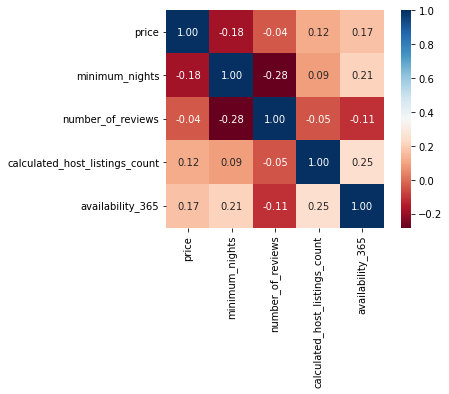

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    1217
Private room        652
Hotel room           12
Shared room           2
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.646309
Private room       0.346256
Hotel room         0.006373
Shared room        0.001062
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Cambridge Highlands      274.000000
Area 2/MIT               273.790268
East Cambridge           240.832884
Neighborhood Nine        197.108108
West Cambridge           193.988636
Cambridgeport            192.934641
Mid-Cambridge            186.211009
Wellington-Harrington    182.853933
The Port                 181.365854
Agassiz                  179.132530
North Cambridge          161.187215
Strawberry Hill          160.137255
Riverside                155.860465
Name: price, dtype: float64

Como são fornecidas as latitudes e longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

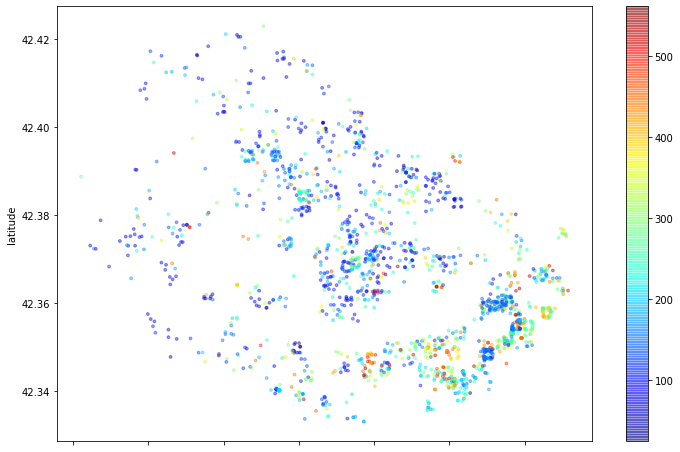

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

9.742432288900691

## Conclusões


* Após a limpeza de *outliers*, foi possível notar uma melhor distribuição dos dados representado nos gráficos.

*   O cálculo da variável `price` após ser realizada a limpeza de *outliers*, mostrou que de fato estava sofrendo distorção no valor.

* Segundo a análise, a região mais cara na média é `Cambridge Highlands`. Vale lembrar que trata-se de uma versão resumida do dataset, a quantidade de imóveis por Bairro poderá distorcer os valores. Por se tratar de uma região ocupada por muitos estudantes de graduação e pós-graduação, possívelmente existirá muitas propriedades alugadas se comparada a outras regiões, logo seria ideal realizar uma análise mais aprofundada com o dataset completo.

*  Foi possível notar que a maior parte dos aluguéis são de casas/apartamentos inteiros e/ou salas inteiras, portanto, o anfitrião com isso, pode concluir que haverá mais dificuldade em alugar quartos compartilhados.

